# **Google Stock Price Prediction with RNN & LSTM**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Data Preprocessing
training_data = pd.read_csv('training_set.csv')
training_set = training_data.iloc[:, 1:2].values
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)
x_train = []
y_train = []
for i in range(60, 1236):
    x_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = x_train.reshape(x_train.shape[0], 60, 1)

In [3]:
# Creating the LSTM model
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(units=50, return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(units=50, return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(units=50),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=1)
])
model.compile(optimizer='adam', loss='mean_squared_error')

In [4]:
# Training the LSTM model
model.fit(x_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
37/37 [==============================] - 8s 58ms/step - loss: 0.0030
Epoch 2/100
37/37 [==============================] - 2s 57ms/step - loss: 4.6651e-04
Epoch 3/100
37/37 [==============================] - 2s 57ms/step - loss: 4.4044e-04
Epoch 4/100
37/37 [==============================] - 2s 56ms/step - loss: 4.4815e-04
Epoch 5/100
37/37 [==============================] - 2s 56ms/step - loss: 3.8478e-04
Epoch 6/100
37/37 [==============================] - 2s 57ms/step - loss: 3.5387e-04
Epoch 7/100
37/37 [==============================] - 2s 57ms/step - loss: 3.9914e-04
Epoch 8/100
37/37 [==============================] - 2s 58ms/step - loss: 3.6248e-04
Epoch 9/100
37/37 [==============================] - 2s 57ms/step - loss: 3.6256e-04
Epoch 10/100
37/37 [==============================] - 2s 58ms/step - loss: 3.2547e-04
Epoch 11/100
37/37 [==============================] - 2s 57ms/step - loss: 3.7382e-04
Epoch 12/100
37/37 [==============================] - 2s 56ms/step 

In [11]:
# Making Predictions
test_data = pd.read_csv('test_set.csv')
real_stock_price = test_data.iloc[:, 1:2].values
# Getting predicted stock prices of month Mar 2023
dataset_total = pd.concat((training_data['Open'], test_data['Open']), axis=0)
# stock prices of previous 60 days for each day of Mar 2023
inputs = dataset_total[len(dataset_total)-len(test_data)-60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
x_test = []
for i in range(60, 80):
    x_test.append(inputs[i-60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
predicted_stock_price = model.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 0s 101ms/step


In [ ]:
# Making Predictions
predicted_stock_price = model.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price.reshape(-1, 1))

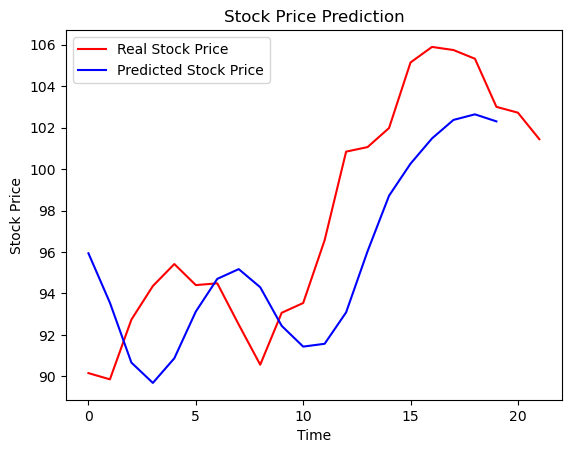

In [8]:
# Visualizing the Results
plt.plot(real_stock_price, color='red', label='Real Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [9]:
print(predicted_stock_price[5]), print(real_stock_price[5])

[93.128296]
[94.404999]


(None, None)